In [1]:
from shapely import Polygon
import numpy as np
import matplotlib.pyplot as plt
from helpers.descriptors import Section

In [2]:
ply = Polygon()

In [3]:
fp = "../../real_data/02_GrotteDeLaCascadeDeMotiers/process/sections_as_polylines/ThirdGallery_1_reordered_2d_088.txt"

In [4]:
sec = Section(np.loadtxt(fp), "ok", 0, from3d=False)

In [5]:
xi = np.linspace(0, 15)
yi = np.linspace(-2, -1)

In [6]:
np.arctan2(yi, xi)

array([-1.57079633, -1.41737241, -1.26791146, -1.1284221 , -1.00269159,
       -0.89213384, -0.79638673, -0.7140907 , -0.64350111, -0.58285685,
       -0.53055789, -0.48522699, -0.44571231, -0.41106455, -0.38050638,
       -0.35340225, -0.32923171, -0.30756711, -0.28805545, -0.27040386,
       -0.25436806, -0.23974311, -0.22635617, -0.21406068, -0.20273169,
       -0.19226213, -0.18255985, -0.17354512, -0.16514868, -0.15731009,
       -0.14997643, -0.14310115, -0.13664316, -0.13056609, -0.12483762,
       -0.11942893, -0.11431425, -0.10947051, -0.10487694, -0.10051482,
       -0.09636724, -0.0924189 , -0.08865588, -0.08506554, -0.08163634,
       -0.07835775, -0.07522013, -0.07221463, -0.06933313, -0.06656816])

In [7]:
sec.compute_descriptors()
sec.fitEllipse()

shape of thetai:  (1425,)
shape of centroid dist:  (1425,)


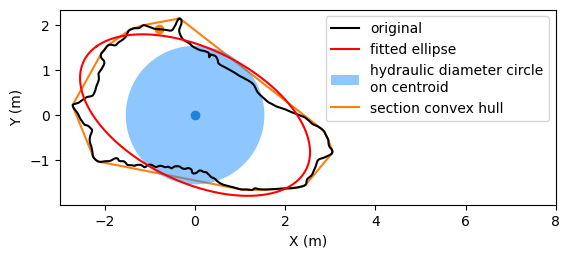

In [8]:
fig, ax = plt.subplots()

sec.plot_basic(ax, verbose=False)
ax.legend()
ax.set_xlim(-3, 8)
ax.scatter(sec.points2d[0,0], sec.points2d[0, 1])
plt.savefig("../../real_data/02_GrotteDeLaCascadeDeMotiers/outputs/basic_ellipse.png", dpi =300)

In [18]:
ellipse_Section = Section(sec.fitted_ellipse,"ok", 0, False)
ellipse_Section.compute_descriptors()

In [23]:
ellipse_Section.perimeter

13.56372495026527

In [25]:
sec.mean_dist_to_ellipse

0.22350827968391856

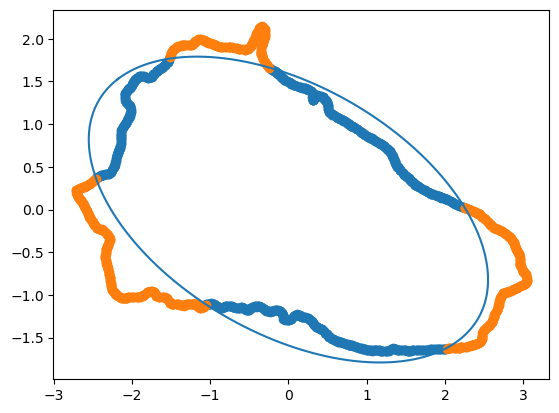

In [9]:
out_points = sec.points2d[sec.outward]
in_points = sec.points2d[~sec.outward]
plt.scatter(out_points[:,0], out_points[:,1])
plt.scatter(in_points[:,0], in_points[:,1])
plt.plot(sec.fitted_ellipse[:,0], sec.fitted_ellipse[:,1])

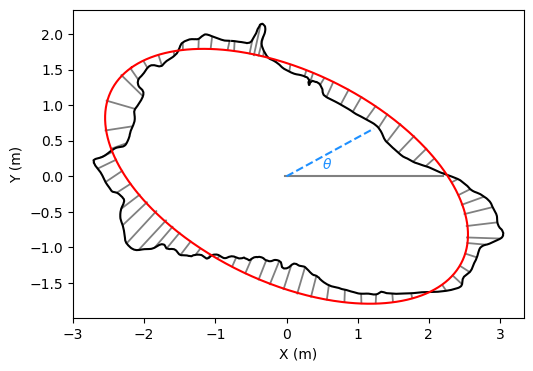

In [27]:
fig, ax = plt.subplots(1, 1, figsize = (13, 4))
ax.plot(sec.points2d[:, 0], sec.points2d[:, 1], label = "original", color = "k")


ax.plot(sec.fitted_ellipse[:,0], sec.fitted_ellipse[:,1], label = "fitted ellipse", color = "r")
ax.quiver(sec.points2d[::20, 0], 
          sec.points2d[::20, 1], 
          sec.vectors_to_ellipse[::20,  0], 
          sec.vectors_to_ellipse[::20,  1], 
          width = 0.004, headlength = 0, 
          headwidth = 0, headaxislength= 0, scale = 6, color = "grey")

ax.set_xlabel("X (m)")
ax.set_ylabel("Y (m)")
ax.set_aspect("equal")
ax.axhline(0, xmin=0.47, xmax=0.82, color = "grey")
ax.text(0.5, 0.1, "$\\theta$", color = "dodgerblue")
ax.plot((0, 1.4* np.cos(0.5)), (0, 1.4 * np.sin(0.5)), color = "dodgerblue", ls = "--")
xi = np.linspace(0, 0.5)
plt.savefig("../../real_data/02_GrotteDeLaCascadeDeMotiers/outputs/best_fit_ellipse.png", dpi = 300)

In [31]:
dists = np.linalg.norm(sec.vectors_to_ellipse, axis = 1)

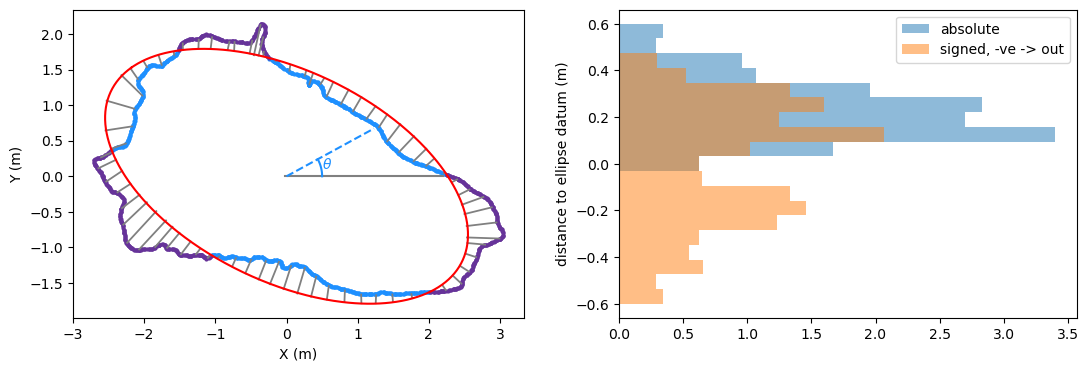

In [43]:
fig, (ax,ax2) = plt.subplots(1, 2, figsize = (13, 4))
ax.scatter(sec.points2d[:, 0][sec.outward], sec.points2d[:, 1][sec.outward], label = "inside", color = "dodgerblue", s= 4)
ax.scatter(sec.points2d[:, 0][~sec.outward], sec.points2d[:, 1][~sec.outward], label = "outside", color = "rebeccapurple", s= 4)

ax.plot(sec.fitted_ellipse[:,0], sec.fitted_ellipse[:,1], label = "fitted ellipse", color = "r")
ax.quiver(sec.points2d[::20, 0], 
          sec.points2d[::20, 1], 
          sec.vectors_to_ellipse[::20,  0], 
          sec.vectors_to_ellipse[::20,  1], 
          width = 0.004, headlength = 0, 
          headwidth = 0, headaxislength= 0, scale = 6, color = "grey")

ax.set_xlabel("X (m)")
ax.set_ylabel("Y (m)")
ax.set_aspect("equal")
ax.axhline(0, xmin=0.47, xmax=0.82, color = "grey")
ax.text(0.5, 0.1, "$\\theta$", color = "dodgerblue")
ax.plot((0, 1.4* np.cos(0.5)), (0, 1.4 * np.sin(0.5)), color = "dodgerblue", ls = "--")
xi = np.linspace(0, 0.5)
ax.plot(0.5* np.cos(xi), 0.5 * np.sin(xi), color = "dodgerblue")
ax2.hist(dists, alpha = 0.5, bins = np.linspace(-0.6, 0.6, 20), density = True, label = "absolute", orientation="horizontal")
ax2.hist(dists*(sec.outward.astype(float)-0.5)*2, alpha = 0.5, bins = np.linspace(-0.6, 0.6, 20), density = True, label = "signed, -ve -> outward", orientation="horizontal")

sk =  
ku = 
ax2.set_ylabel("distance to ellipse datum (m)")
ax2.legend()
plt.savefig("../../real_data/02_GrotteDeLaCascadeDeMotiers/outputs/best_fit_ellipse_in_out.png", dpi = 300)